<a href="https://colab.research.google.com/github/ardhikaxx/ARDHKX-01/blob/main/decision_treeID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn graphviz pydotplus six

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Image
import six
import pydotplus
import graphviz

In [24]:
file_path = '/content/Main_ID3.csv'

In [25]:
df = pd.read_csv(file_path)

print(df.head(14))

       Cuaca    Suhu Kelembaban  Angin   Main
0      Cerah   Panas     Tinggi  Salah  Tidak
1     Cerah    Panas     Tinggi  Benar  Tidak
2   Berawan    Panas     Tinggi  Salah    Ya 
3      Hujan   Sejuk     Tinggi  Salah    Ya 
4      Hujan  Dingin     Normal  Salah    Ya 
5      Hujan  Dingin     Normal  Benar    Ya 
6   Berawan   Dingin     Normal  Benar    Ya 
7     Cerah    Sejuk     Tinggi  Salah  Tidak
8     Cerah   Dingin     Normal  Salah    Ya 
9      Hujan   Sejuk     Normal  Salah    Ya 
10    Cerah    Sejuk     Normal  Benar    Ya 
11  Berawan    Sejuk     Tinggi  Benar    Ya 
12  Berawan    Panas     Normal  Salah    Ya 
13     Hujan   Sejuk     Tinggi  Benar  Tidak


In [26]:
print(df.columns)

Index(['Cuaca', 'Suhu', 'Kelembaban', 'Angin', 'Main'], dtype='object')


In [27]:
from sklearn. preprocessing import LabelEncoder

print("Original DataFrame:")
print(df.head())

le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

print("Label Encoded DataFrame:")
print(df.head(14))

Original DataFrame:
      Cuaca    Suhu Kelembaban  Angin   Main
0     Cerah   Panas     Tinggi  Salah  Tidak
1    Cerah    Panas     Tinggi  Benar  Tidak
2  Berawan    Panas     Tinggi  Salah    Ya 
3     Hujan   Sejuk     Tinggi  Salah    Ya 
4     Hujan  Dingin     Normal  Salah    Ya 
Label Encoded DataFrame:
    Cuaca  Suhu  Kelembaban  Angin  Main
0       1     1           1      1     0
1       2     1           1      0     0
2       0     1           1      1     1
3       3     2           1      1     1
4       3     0           0      1     1
5       3     0           0      0     1
6       0     0           0      0     1
7       2     2           1      1     0
8       2     0           0      1     1
9       3     2           0      1     1
10      2     2           0      0     1
11      0     2           1      0     1
12      0     1           0      1     1
13      3     2           1      0     0


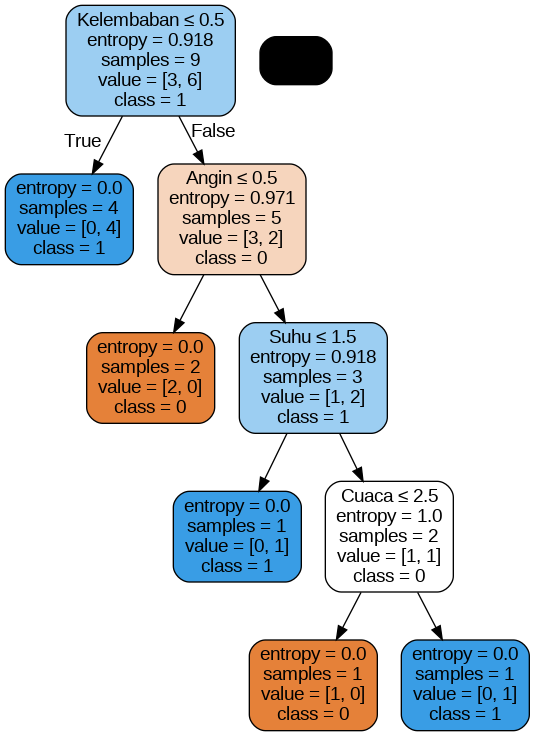

In [28]:
X = df.drop(columns=['Main'])
y = df ['Main']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

dot_data = six.StringIO()
exported_tree = tree. export_graphviz(clf, out_file=None,
feature_names=X.columns,
class_names=np.unique(y).astype(str),
filled=True, rounded=True,
special_characters=True)

graph = pydotplus.graph_from_dot_data(exported_tree)
Image(graph.create_png())

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print ("Predictions:")
print(y_pred)

results = pd. DataFrame({
'Actual': y_test.values,
'Predicted': y_pred
})

print("Actual vs Predicted:")
print(results.head())

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Predictions:
[1 0 1 1 1]
Actual vs Predicted:
   Actual  Predicted
0       1          1
1       1          0
2       0          1
3       1          1
4       1          1

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5

